In [1]:
import datalab.bigquery as bq
import pandas as pd

In [2]:
%%sql --module requests
select * from [plasma-centaur-859:blockchain.senders_over_time] 


In [5]:
%%bigquery execute --query requests

no_of_senders,year,month
593555,2013,4
258535,2011,6
188418,2012,6
111535,2011,11
92427,2012,1
130496,2011,10
1694,2009,6
1753,2010,1
1835,2010,2
579574,2013,8


In [8]:
df = bq.Query(requests).to_dataframe()

In [9]:
df['datetime']=pd.to_datetime(df['year'].astype(str)+'/'+df['month'].astype(str))
df

,no_of_senders,year,month,datetime
0,593555,2013,4,2013-04-01
1,258535,2011,6,2011-06-01
2,188418,2012,6,2012-06-01
3,111535,2011,11,2011-11-01
4,92427,2012,1,2012-01-01
5,130496,2011,10,2011-10-01
6,1694,2009,6,2009-06-01
7,1753,2010,1,2010-01-01
8,1835,2010,2,2010-02-01
9,579574,2013,8,2013-08-01


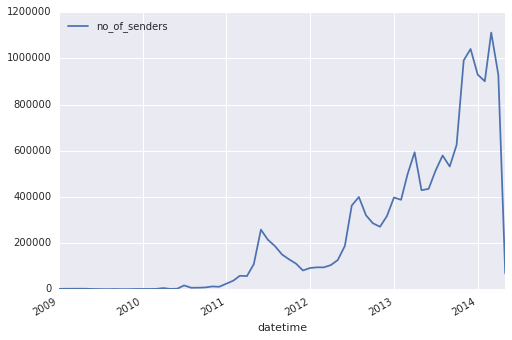

In [10]:
#plotdf=pd.Series(df['no_of_senders'],index=df['datetime'])
df.plot(x='datetime',y='no_of_senders')


In [1]:
%%sql --module taxi

DEFINE QUERY locations
  SELECT FLOAT(pickup_latitude) AS lat, FLOAT(pickup_longitude) AS lon, medallion
  FROM [833682135931:nyctaxi.trip_data]

DEFINE QUERY geohashes
  SELECT lat, lon,
         CONCAT(STRING(FLOOR(lat*1000+0.5)/1000), ':', STRING(FLOOR(lon*1000+0.5)/1000)) AS geoid,
         medallion
  FROM $locations
  WHERE lat != 0 AND lon != 0

DEFINE QUERY hotspots
  SELECT FIRST(lat) AS lat, FIRST(lon) AS lon, COUNT(medallion) AS pickups
  FROM $geohashes
  WHERE ABS(HASH(medallion)) % 1000 == 1
  GROUP BY geoid
  ORDER BY pickups DESC
  LIMIT 25

In [2]:
%%chart map --fields lat,lon,pickups --data taxi.hotspots
showTip: true
mapType: normal

In [4]:
!pip install bitcoin

  Running setup.py bdist_wheel for bitcoin ... - done
  Stored in directory: /root/.cache/pip/wheels/15/d9/46/0029939110ce681cbcb1b94b8952f475eb3562e65cd99d311f
Successfully built bitcoin


In [6]:
import bitcoin
import pyspark
from pyspark.sql import Row
from pyspark import SparkContext

sc = SparkContext( 'spark://bl-analyzer-m:7077', 'pypark')

ImportError: No module named pyspark

In [ ]:
dataFile=sc.textFile("gs://testdata-bg-ml/blockchain/pubkey_list.txt")\
    .map(lambda x: (str(x), bitcoin.pubkey_to_address(str(x))))

In [ ]:
dataFile.take(10)